In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import time
import pickle
from scipy.stats import uniform

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading dataset
credit = pd.read_csv("/content/drive/MyDrive/final_proyect/credit_scores.csv",low_memory=False)
df = credit.copy()


# Dropping Columns

In [6]:
delete_columns = ["Name", "SSN", "ID", "Customer_ID"]
df.drop(delete_columns, axis=1, inplace=True)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Score,Count_Auto Loan,Count_Credit-Builder Loan,Count_Personal Loan,Count_Home Equity Loan,Count_Not Specified,Count_Mortgage Loan,Count_Student Loan,Count_Debt Consolidation Loan,Count_Payday Loan
0,July,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3.0,8,...,Good,1.0,1.0,1.0,1.0,0.0,0,0,0,0
1,February,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,7.0,1,...,Good,0.0,1.0,0.0,0.0,0.0,0,0,0,0
2,May,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,3.0,1,...,Good,0.0,1.0,0.0,0.0,0.0,0,0,0,0
3,June,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,3.0,0,...,Good,0.0,1.0,0.0,0.0,0.0,0,0,0,0
4,August,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,3.0,4,...,Good,0.0,1.0,0.0,0.0,0.0,0,0,0,0


# Selecting Numerical and Categorical Data

In [7]:
numerical_format=['float64','int']
numerical_data = df.select_dtypes(include=numerical_format).columns
categorical_data = df.select_dtypes(include='object').columns


In [8]:
# Dropping values
# Age
df.drop(df[df.Age < 0].index, inplace=True)

# Num_Bank_Accounts
df.drop(df[df["Num_Bank_Accounts"] < 0].index, inplace=True)

# Reseting index values
df.reset_index(drop=True, inplace=True)

In [9]:
df.isna().sum()

Month                            2
Age                              2
Occupation                       2
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                1
Num_Credit_Card                  1
Interest_Rate                    1
Delay_from_due_date              3
Num_of_Delayed_Payment           0
Changed_Credit_Limit             1
Num_Credit_Inquiries             3
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               3
Payment_of_Min_Amount            0
Total_EMI_per_month              4
Amount_invested_monthly          0
Payment_Behaviour                1
Monthly_Balance                  1
Credit_Score                     0
Count_Auto Loan                  1
Count_Credit-Builder Loan        2
Count_Personal Loan              2
Count_Home Equity Loan           1
Count_Not Specified              4
Count_Mortgage Loan              0
Count_Student Loan  

In [10]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Selecting again the numerical and categorical
numerical_format = ['float64', 'int']
numerical_data = X.select_dtypes(include=numerical_format).columns
categorical_data = X.select_dtypes(include='object').columns

In [13]:
# Numerical pipeline
mean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', mean_pipeline, numerical_data),
    ('cat', cat_pipeline, categorical_data)
], remainder='passthrough')

# SVC model and pipelines

In [15]:
# Create a complete pipeline with the preprocessor and the SVM model
svm_credit_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC()) # kernel='rbf', C=10
])

In [16]:
# Fit the SVM model on the training data
svm_credit_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num...
       'Count_Mortgage Loan', 'Count_Student Loan',
       'Count_Debt Consolidation Loan', 'Count_Payday Loan'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('classifier', SVC())])

In [17]:
y_pred = svm_credit_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.3f}")

Accuracy of the SVM model: 0.679


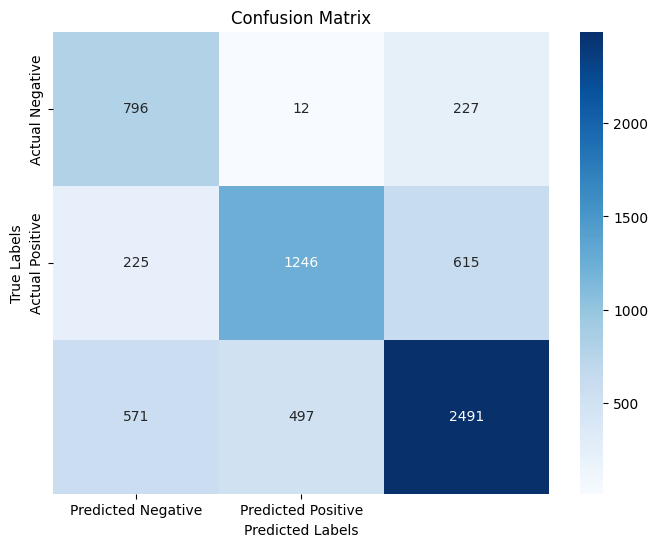

In [20]:
# Step 4: Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 5: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
with open('svm_credit_model.pkl','wb') as file:
  pickle.dump(svm_credit_model, file)